# California Housing — Simple Linear Regression

## Step 1: Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

## Step 2: Load the California Housing Data

In [2]:
# Load dataset
california = fetch_california_housing(as_frame=True)

# Convert to DataFrame
df = california.frame
df.to_csv('california.csv', index= False,encoding='utf-8')
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Step 3: Data Cleaning, EDA, Feature Engineering, Outlier Handling

### Step 3.1: Initial Data Inspection

In [3]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

### Step 3.2: Visual EDA

#### 1. Correlation Matrix

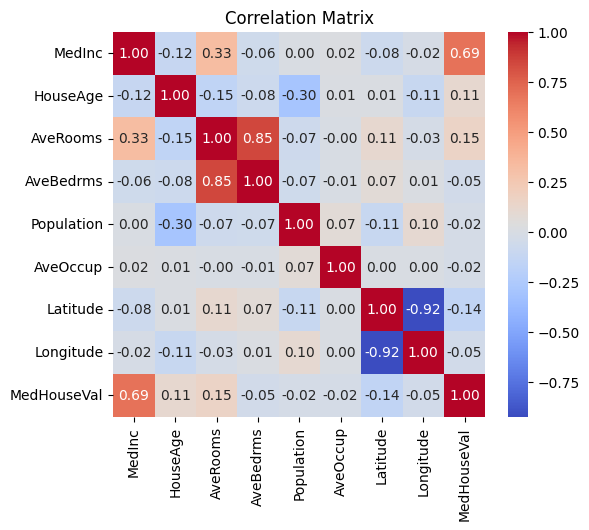

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

#### 2. Target Distribution

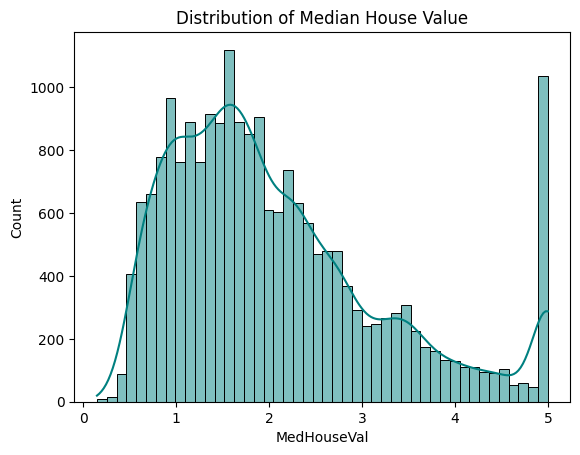

In [5]:
sns.histplot(df['MedHouseVal'], kde=True, color='teal')
plt.title("Distribution of Median House Value")
plt.show()

#### 3. Scatterplots of Target vs Features

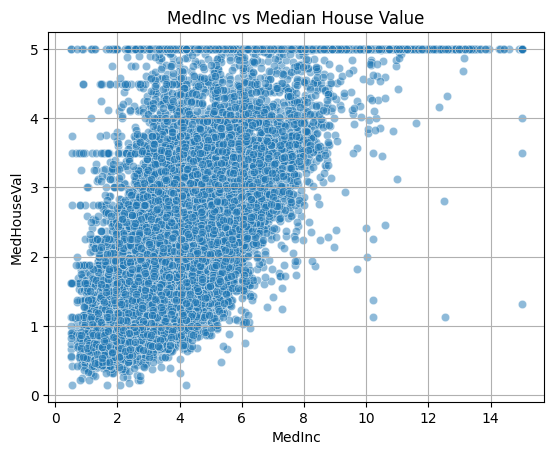

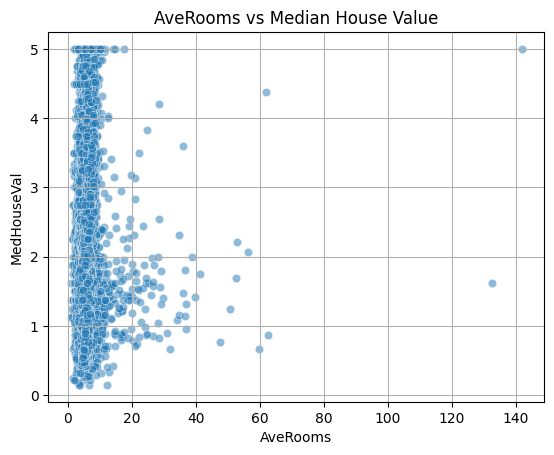

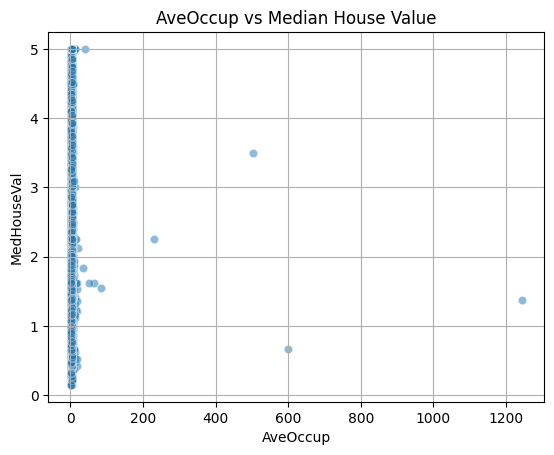

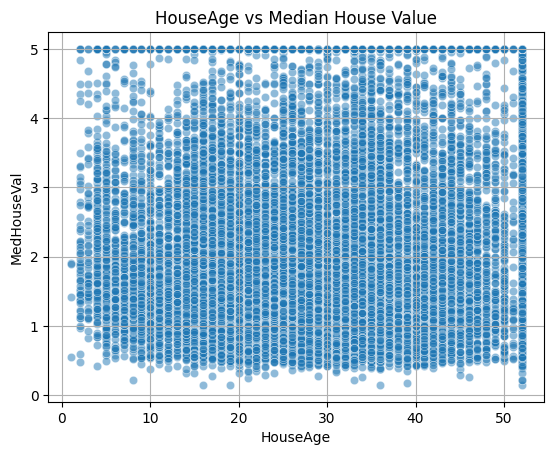

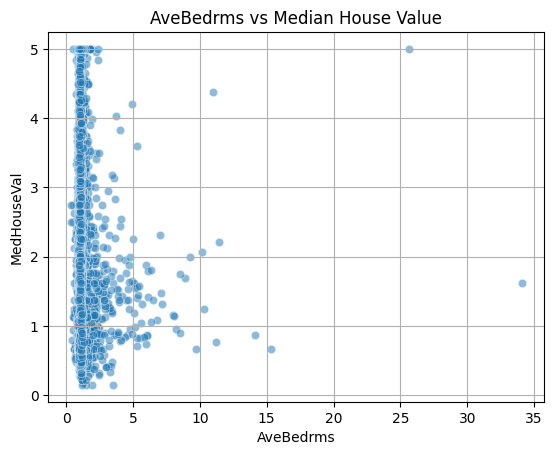

In [6]:
features = ['MedInc', 'AveRooms', 'AveOccup', 'HouseAge', 'AveBedrms']

for col in features:
    sns.scatterplot(x=df[col], y=df['MedHouseVal'], alpha=0.5)
    plt.title(f'{col} vs Median House Value')
    plt.xlabel(col)
    plt.ylabel('MedHouseVal')
    plt.grid(True)
    plt.show()

### Step 3.3 : Finalise X and y

In [7]:
X = df[['MedInc']]  # For Simple Linear Regression
y = df['MedHouseVal']

##  Step 4: Train-Test Split

In [8]:
from sklearn.model_selection import train_test_split

# Define X and y
X = df[['MedInc']]  # must be a 2D array
y = df['MedHouseVal']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Step 5: Train the Model

In [9]:
from sklearn.linear_model import LinearRegression

# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Step 6: Evaluate the Model

In [10]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on test set
y_pred = model.predict(X_test)

# Evaluation metrics
print(f"Intercept: {model.intercept_}")
print(f"Slope (Coefficient): {model.coef_[0]}")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.4f}")

Intercept: 0.44459729169078677
Slope (Coefficient): 0.4193384939381274
R² Score: 0.4589
Mean Squared Error: 0.7091


##  Step 7: Visualize Regression Line

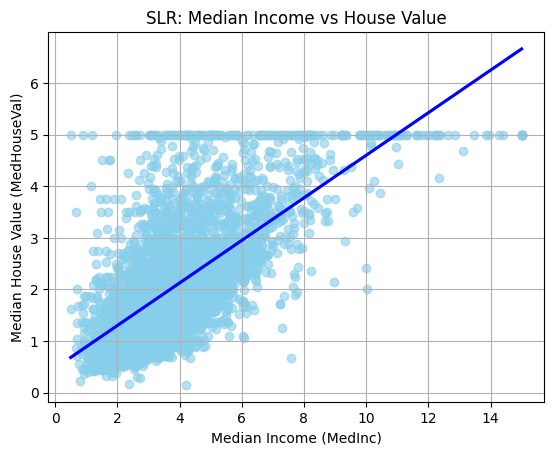

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.regplot(
    x=X_test['MedInc'],
    y=y_test,
    scatter_kws={'color': 'skyblue', 'alpha': 0.6},
    line_kws={'color': 'blue'},
    ci=None
)

plt.xlabel('Median Income (MedInc)')
plt.ylabel('Median House Value (MedHouseVal)')
plt.title('SLR: Median Income vs House Value')
plt.grid(True)
plt.show()

## Save the Trained Model

In [ ]:
import joblib

# Save model to a file
joblib.dump(model, 'slr_model.pkl')

['slr_model.pkl']

## Create the Flask App

In [13]:
from flask import Flask, render_template, request
import joblib
import numpy as np

app = Flask(__name__)

# Load the trained model
model = joblib.load('slr_model.pkl')

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    income = float(request.form['income'])
    prediction = model.predict(np.array([[income]]))[0]
    return render_template('index.html', income=income, prediction=prediction)

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat
Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
    ~~~~~~~~~~~~~~~~~~~~~~~^^
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/traitlets/config/application.py", line 1074, in launch_instance
    app.initialize(argv)
    ~~~~~~~~~~~~~~^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/traitlets/config/application.py", line 118, in inner
    return method(app, *args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/ipykernel/kernelapp.py", line 692, in initialize
    self.init_sockets()
    ~~~~~~~~~~~~~~~~~^^
  File "/Library/F

SystemExit: 1

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
